In [1]:
# !pip install tables --upgrade

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car/'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [4]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [0]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

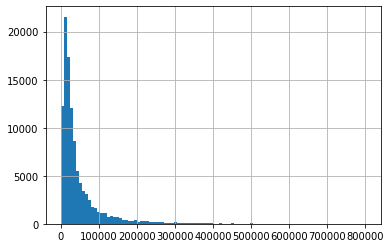

In [5]:
df['price_value'].hist(bins=100);

In [6]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [14]:
np.quantile(df['price_value'], 0.95)

165000.0

In [0]:
# df['price_value'].map(lambda x: np.log(x)).hist(bins=100);

In [0]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [0]:
def group_and_barplot(df, feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
 return (
     df.
      groupby(feat_groupby)[feat_agg].
      agg(agg_funcs).
      sort_values(by=feat_sort, ascending=False).
      head(top)
    ).plot(kind='bar', figsize=(15,5), subplots=subplots);

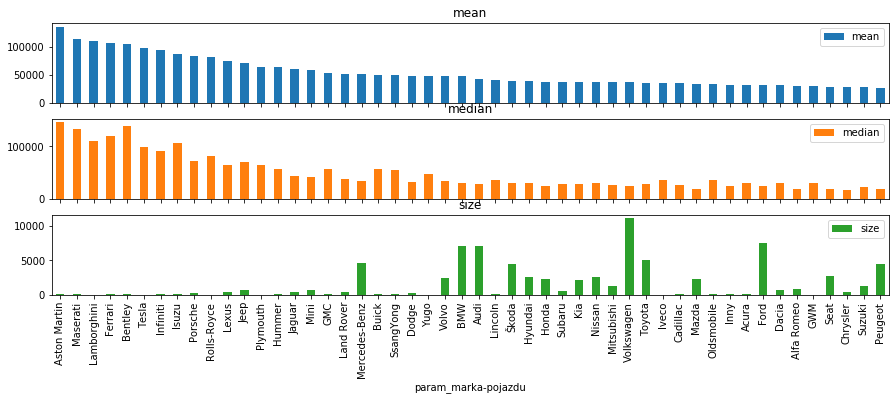

In [23]:
group_and_barplot(df[df['price_value'] < 165000], 'param_marka-pojazdu');

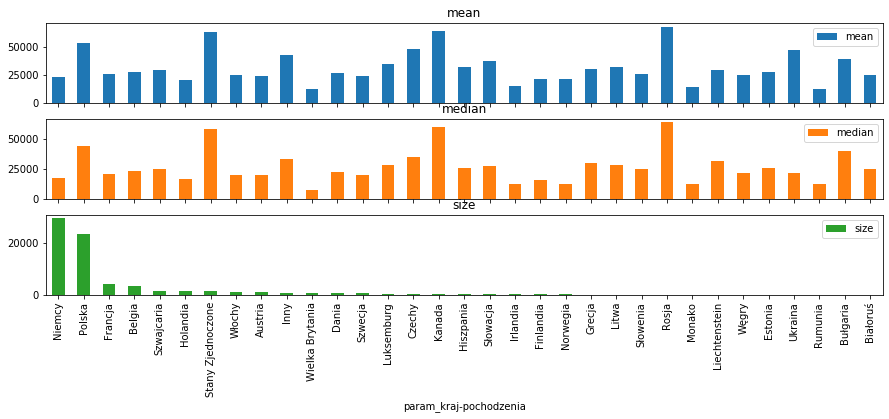

In [24]:
group_and_barplot(df[df['price_value'] < 165000], 'param_kraj-pochodzenia', feat_sort='size');

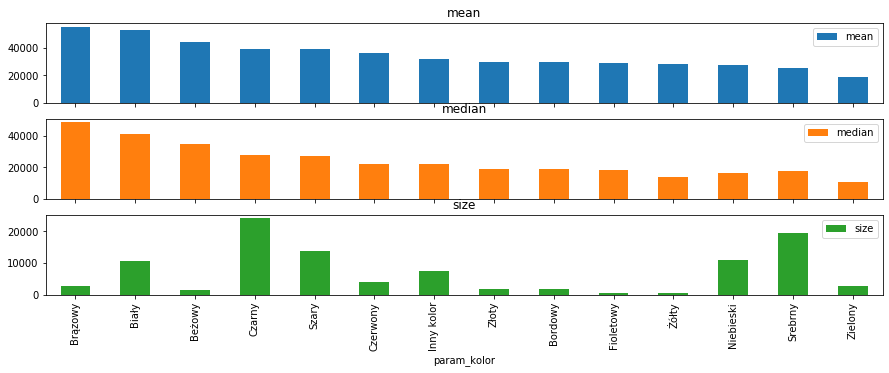

In [27]:
group_and_barplot(df[df['price_value'] < 165000], 'param_kolor');

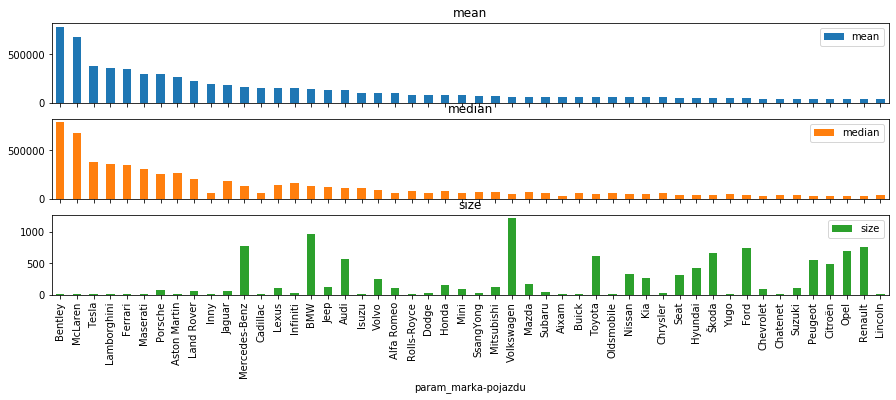

In [0]:
group_and_barplot(df[df['param_kolor'].isin(['Biały'])], 'param_marka-pojazdu');

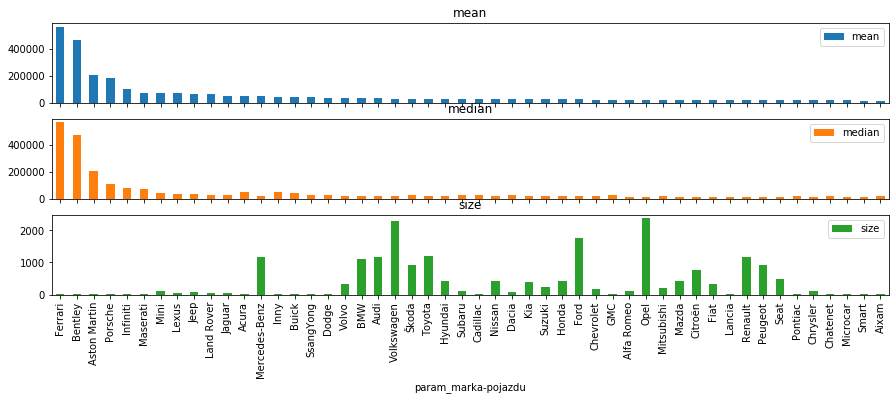

In [0]:
group_and_barplot(df[df['param_kolor'].isin(['Srebrny'])], 'param_marka-pojazdu');

In [0]:
def group_and_barplot(df, feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
 return (
     df.
      groupby(feat_groupby)[feat_agg].
      agg(agg_funcs).
      sort_values(by=feat_sort, ascending=False).
      head(top)
    )

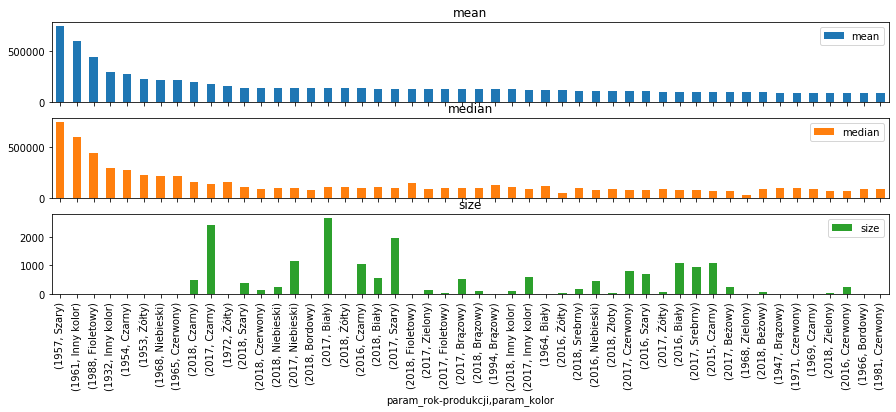

In [0]:
group_and_barplot(df, ['param_rok-produkcji', 'param_kolor']);

In [0]:
df2 = df[(df['param_kraj-pochodzenia'] == 'Polska')].groupby(['param_marka-pojazdu', 'param_kolor'])['price_value'].agg(np.mean).unstack()

In [0]:
df3 = (df2['Biały'] - df2['Czarny'])

In [0]:
df3 = df3[~df3.isna()]

In [0]:
df3.sort_values()

param_marka-pojazdu
Aston Martin     -68620.000000
Dodge            -54182.200000
Lancia           -21934.333333
Saab             -16615.200000
Dacia            -13833.408791
Isuzu            -11808.866667
Škoda             -6497.109486
Fiat              -6318.688772
Renault           -4092.725719
Mercedes-Benz     -3293.991936
Opel              -1326.336059
Hyundai             167.526071
Chevrolet           810.829024
Daewoo             1301.000000
Toyota             1813.338767
Kia                4179.131590
Nissan             5335.293478
Peugeot            5563.887133
Citroën            8520.492493
Ford               9299.324509
BMW               14092.568549
Volkswagen        15115.283174
Suzuki            15291.881290
Smart             18424.555556
Mazda             19165.917019
Mini              22075.947930
Audi              22274.921260
Chrysler          23700.000000
Jaguar            25091.838519
Mitsubishi        25473.174174
Volvo             30823.819336
SsangYong         3

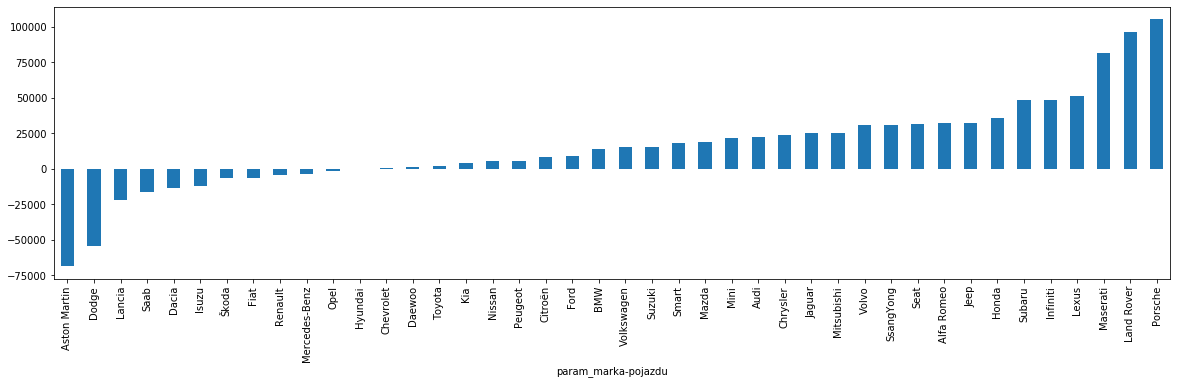

In [0]:
df3.sort_values().plot(kind='bar', figsize=(20,5));

In [0]:
df2 = df[(df['param_rok-produkcji'].map(lambda x: int(x) if x else 0) >= 1990) & (df['price_value'] < 165000)].groupby(['param_rok-produkcji', 'param_kolor'])['price_value'].agg(np.mean).unstack()

In [8]:
df2

param_kolor,Beżowy,Biały,Bordowy,Brązowy,Czarny,Czerwony,Fioletowy,Inny kolor,Niebieski,Srebrny,Szary,Zielony,Złoty,Żółty
param_rok-produkcji,,,,,,,,,,,,,,
1990,6925.666667,9912.375000,4899.666667,NaN,14896.181818,11527.555556,20266.666667,11032.833333,16524.875000,16783.333333,12827.142857,10571.285714,16350.000000,29999.000000
1991,7500.000000,9655.555556,7819.800000,13300.000000,13046.076923,8736.272727,15900.000000,9341.428571,10009.866667,13358.250000,6135.181818,15911.111111,24633.000000,14800.000000
1992,18900.000000,16449.350000,8676.076923,14400.000000,11547.263158,9539.812500,15900.000000,13612.500000,11729.800000,12204.000000,6819.153846,17656.666667,1750.000000,21500.000000
1993,NaN,22277.666667,14012.375000,11024.750000,14322.500000,4442.714286,11916.000000,8408.333333,6921.357143,12069.000000,14808.250000,7855.200000,21733.333333,NaN
1994,NaN,13819.933333,10766.666667,NaN,13159.472222,9327.714286,19900.000000,6659.888889,6770.250000,11194.714286,13753.538462,11640.782609,8675.000000,NaN
1995,10849.500000,8328.833333,6793.000000,NaN,12234.538462,7247.400000,6212.375000,8451.093750,8614.833333,12213.869565,10055.333333,8985.875000,26266.666667,2839.500000
1996,3500.000000,10240.818182,7030.653846,6349.500000,9510.250000,5084.656250,6684.538462,7270.441176,5981.859375,11254.261905,7279.800000,6868.972603,9949.285714,5800.000000
1997,20100.000000,14873.533333,4877.551724,5342.571429,9239.846154,4830.500000,2862.500000,6291.728814,7091.241667,7098.655556,8169.800000,5976.563218,7977.600000,3583.333333
1998,7650.000000,7349.972222,5789.021739,5562.200000,8584.128788,5904.691176,4642.500000,7426.535714,6587.345794,7096.507246,7059.096774,7182.090909,5967.142857,6308.727273


In [0]:
def rank_index(vector):
    return [vector.index(x) for x in sorted(range(n), key=vector.__getitem__)]

In [18]:
for i in range(df.shape[1]):
  df2.iloc[i,] = df2.iloc[i,].fillna(0)
  df2.iloc[i,] = [sorted(df2.iloc[i,], reverse=True).index(x) + 1 for x in df2.iloc[i,]]

IndexError: ignored

In [19]:
df2

param_kolor,Beżowy,Biały,Bordowy,Brązowy,Czarny,Czerwony,Fioletowy,Inny kolor,Niebieski,Srebrny,Szary,Zielony,Złoty,Żółty
param_rok-produkcji,,,,,,,,,,,,,,
1990,12.0,9.0,13.0,14.0,5.0,6.0,4.0,3.0,2.0,7.0,10.0,11.0,8.0,1.0
1991,14.0,6.0,7.0,11.0,3.0,2.0,8.0,13.0,10.0,4.0,12.0,5.0,1.0,9.0
1992,6.0,9.0,10.0,11.0,2.0,12.0,1.0,13.0,7.0,5.0,4.0,8.0,14.0,3.0
1993,13.0,1.0,2.0,9.0,6.0,8.0,4.0,10.0,12.0,7.0,5.0,11.0,3.0,13.0
1994,13.0,6.0,9.0,1.0,5.0,7.0,3.0,12.0,11.0,2.0,4.0,8.0,10.0,13.0
1995,8.0,11.0,6.0,14.0,4.0,3.0,12.0,10.0,9.0,2.0,5.0,7.0,1.0,13.0
1996,14.0,2.0,8.0,10.0,4.0,13.0,9.0,7.0,11.0,1.0,6.0,5.0,3.0,12.0
1997,1.0,2.0,12.0,11.0,3.0,8.0,14.0,9.0,7.0,6.0,4.0,10.0,5.0,13.0
1998,4.0,2.0,12.0,13.0,1.0,11.0,14.0,3.0,8.0,5.0,7.0,6.0,10.0,9.0


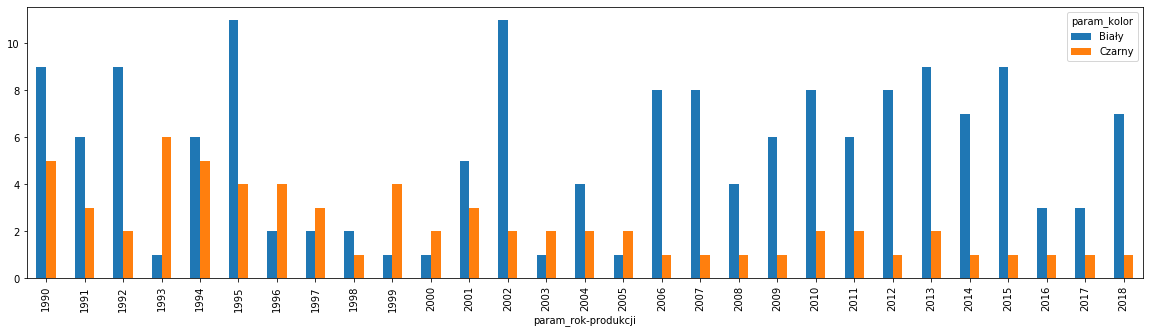

In [20]:
df2.loc[:,[x in ['Biały', 'Czarny'] for x in list(df2.columns.values)]].plot(kind='bar', figsize=(20,5), by='param_rok-produkcji');

In [0]:
list(df2.columns.values)

['Beżowy',
 'Biały',
 'Bordowy',
 'Brązowy',
 'Czarny',
 'Czerwony',
 'Fioletowy',
 'Inny kolor',
 'Niebieski',
 'Srebrny',
 'Szary',
 'Zielony',
 'Złoty',
 'Żółty']